In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import warnings
warnings.filterwarnings("ignore")
import prepare
import acquire
import statsmodels.api as sm

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
df = acquire.get_all_sales_data()
df.head(3)

,sale_date,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14
sale_amount,,,,,,,,,,,,,
13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013
14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [4]:
germany_df = acquire.get_germany_power()
germany_df.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [5]:
df = prepare.prep_all_sales(df)
df.head(3)

,sale_amount,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_id,item_brand,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,January,Tuesday,10.92
2013-01-01,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,12,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,January,Tuesday,218.40
2013-01-01,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,46,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,January,Tuesday,125.55


In [6]:
germany_df = prepare.prep_germany(germany_df)
germany_df.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006


Do your work for this exercise in a notebook named explore. 
- Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

### Store Item Demand Dataset

#### Percentage Based Data Split

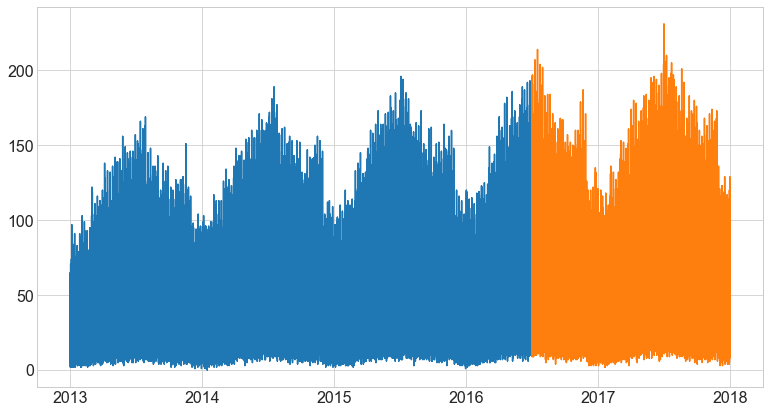

In [7]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

We'll store our target in a variable named y for ease of access.

In [8]:
y = train.sale_amount
y.head(3)

sale_date
2013-01-01    13.0
2013-01-01    26.0
2013-01-01    27.0
Name: sale_amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

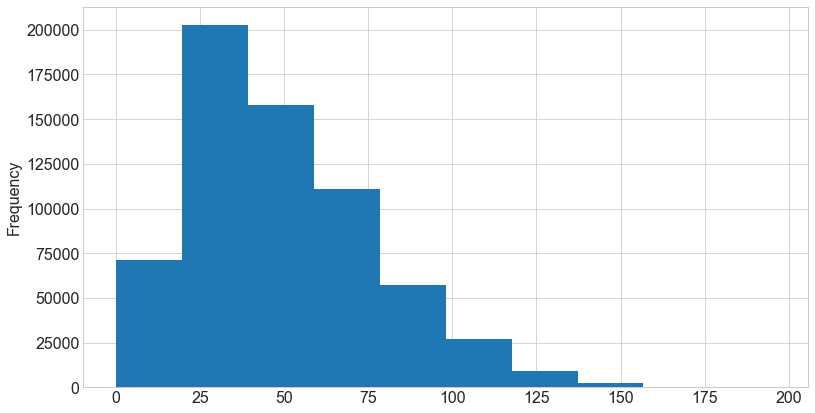

In [9]:
y.plot.hist()

We could also treat components of the date as a seperate categorical feature.

[Text(0.5, 1.0, 'Average Sales Amount by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sales')]

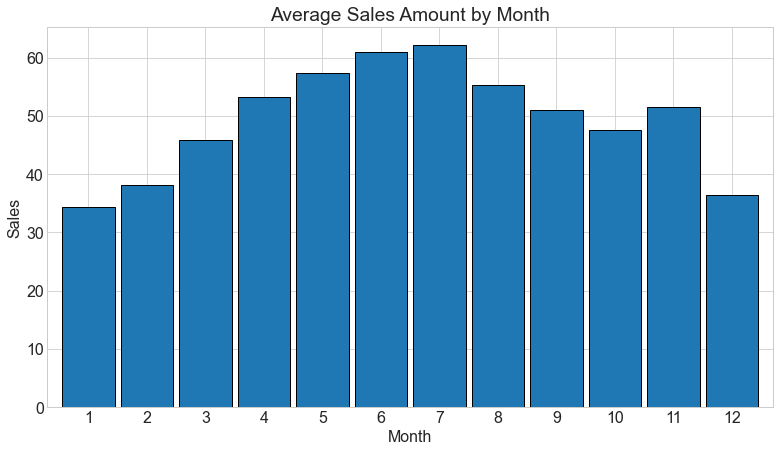

In [10]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Amount by Month', xlabel='Month', ylabel='Sales')

By day of week

[Text(0.5, 1.0, 'Average Sales Amount by Weekday'),
 Text(0.5, 22.200000000000003, 'Weekday'),
 Text(22.200000000000003, 0.5, 'Sales')]

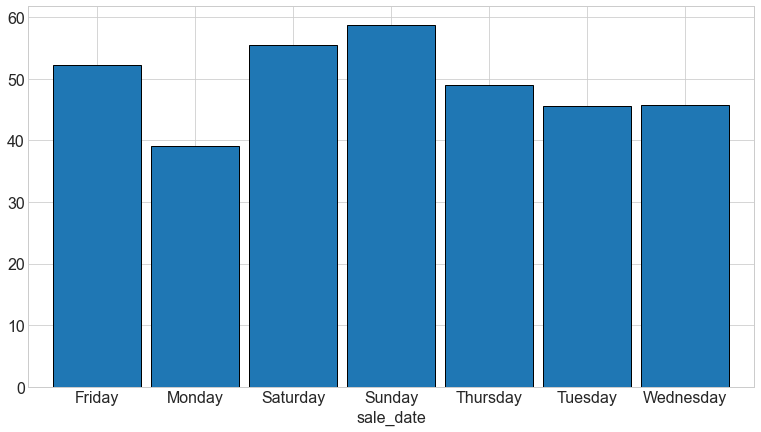

In [11]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales Amount by Weekday', xlabel='Weekday', ylabel='Sales')

We can combine multiple resampling periods on a single viz

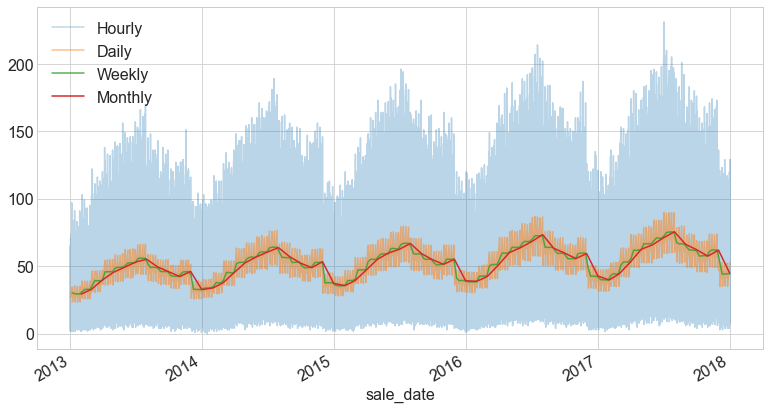

In [12]:
ax = df['sale_amount'].plot(alpha=.3, label='Hourly')
df['sale_amount'].resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
df['sale_amount'].resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
df['sale_amount'].resample('M').mean().plot(ax=ax, label='Monthly')
ax.legend()

Boxplot

<AxesSubplot:xlabel='sale_date', ylabel='sale_amount'>

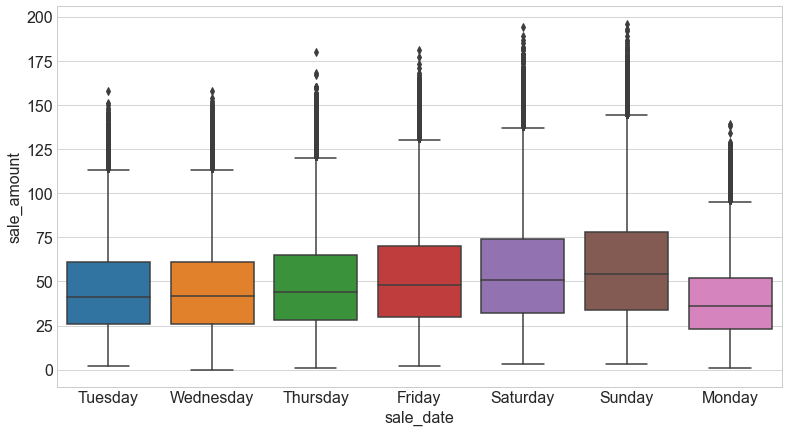

In [13]:
sns.boxplot(x = train.index.day_name(), y = 'sale_amount', data = train)

### Visualize the target over time

<AxesSubplot:xlabel='sale_date'>

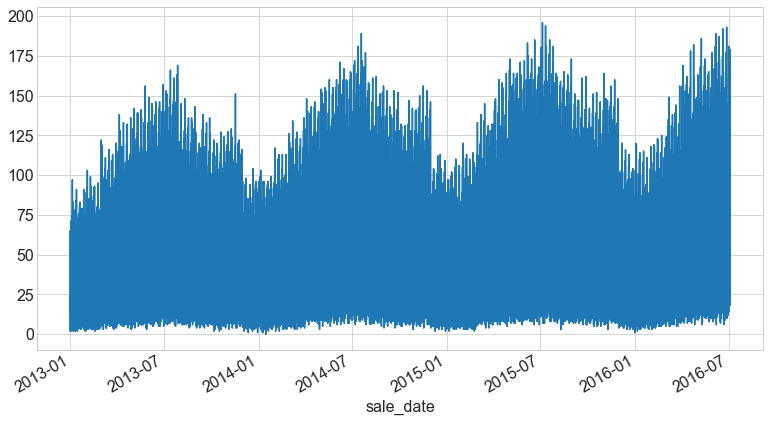

In [14]:
y.plot()

#### We can also resample our target and visualize it over various time periods.

In [15]:
#y.resample('6H').mean().plot(title='6 hour average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

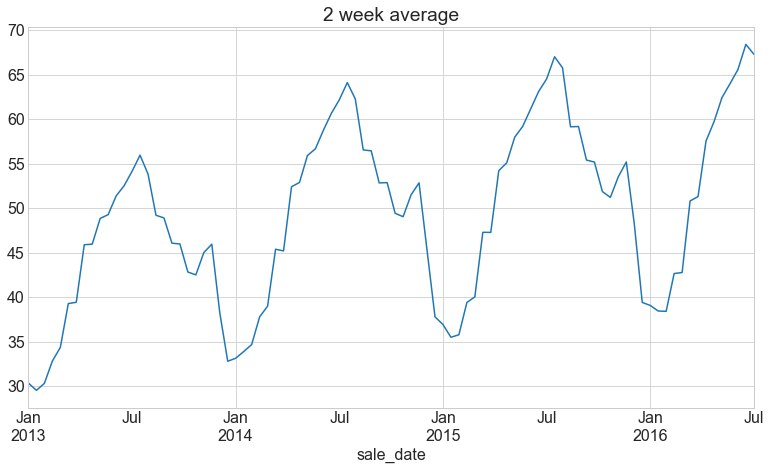

In [16]:
y.resample('2W').mean().plot(title='2 week average')

We can combine these visualizations to see how the aggregating smoothes out the data.

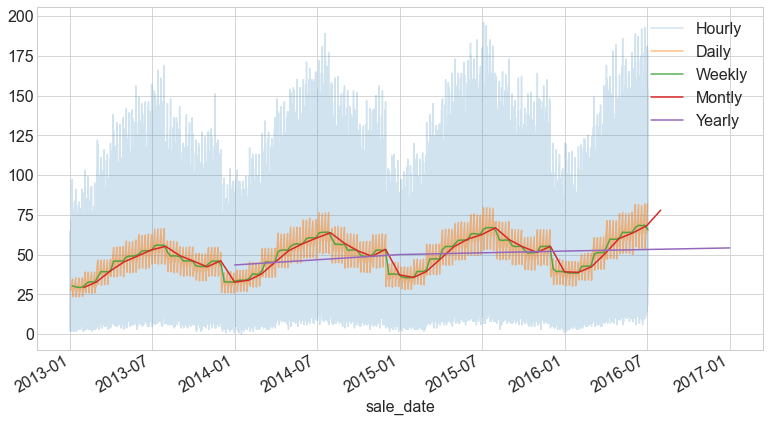

In [17]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

#### In addition to resampling, we can calculate Moving Averages with the .rolling method.

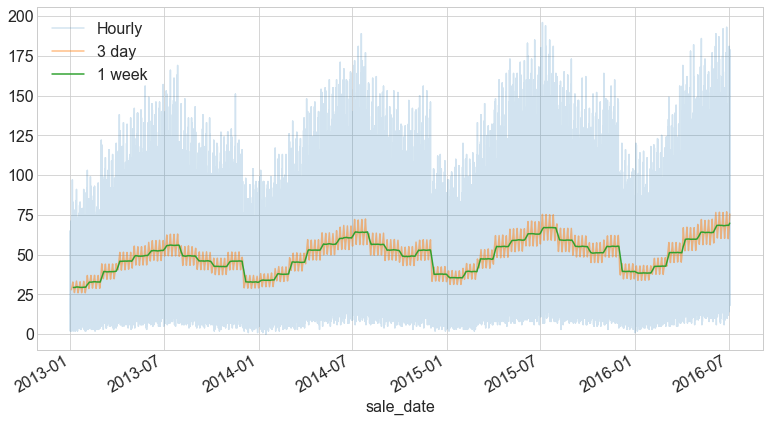

In [18]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

### Visualize change over time

#### Differences

.diff lets us take the difference between the current and previous value

<AxesSubplot:title={'center':'Average week-to-week change in sales'}, xlabel='sale_date'>

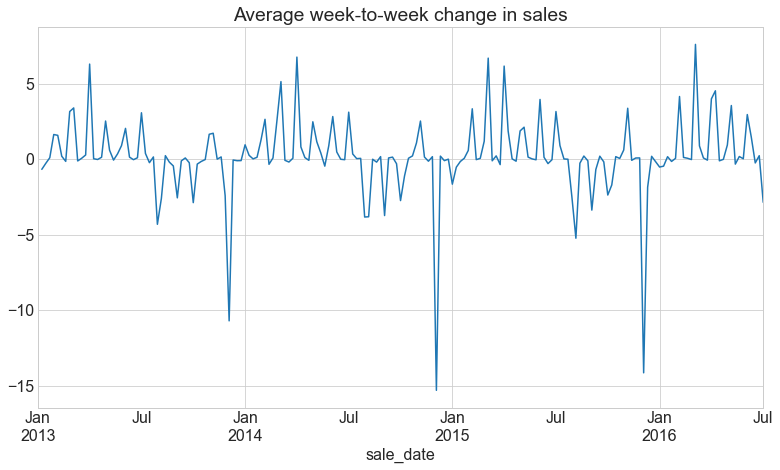

In [19]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales')

Let's visualize the monthly change:

<AxesSubplot:title={'center':'Average month-to-month change in sales'}, xlabel='sale_date'>

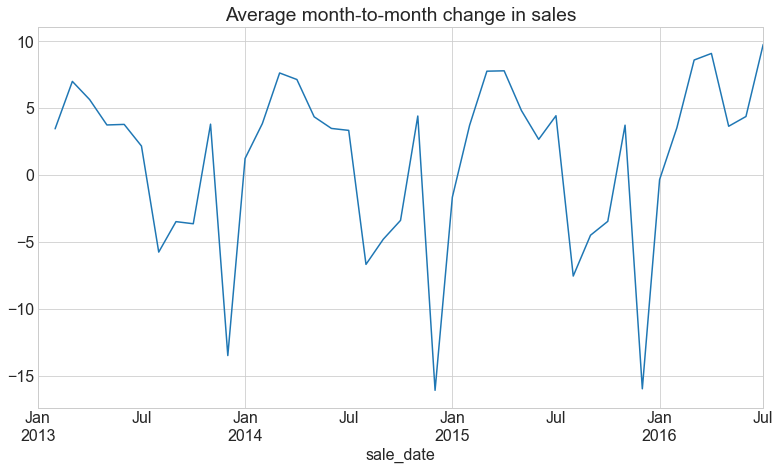

In [20]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales')

#### Seasonal Plot

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

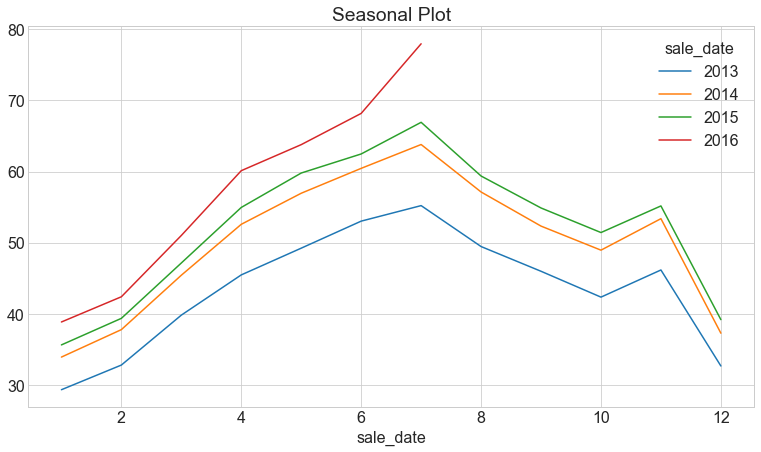

In [21]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

#### Seasonal Subseries Plot

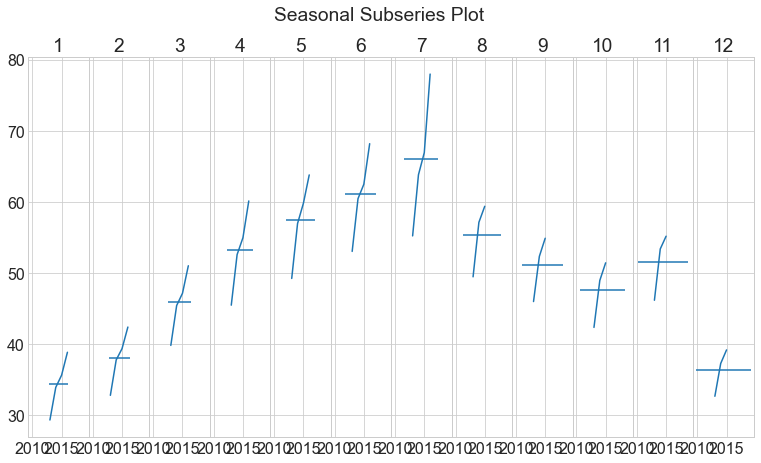

In [22]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

#### Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

If your data is sampled daily, you could think of 't' as 'today', 't+1' is 'tomorrow'. In reality, 't'
is any given time period and 't+1' is the time period after. If your data is sampled weekly, 't' is any given week, and 't+1' is the following week.

In general, we will measure 't', y 't' on the x-axis against the next time step, 'yt+1', on the y-axis.

Text(0.5, 1.0, 'Lag plot with lag=1')

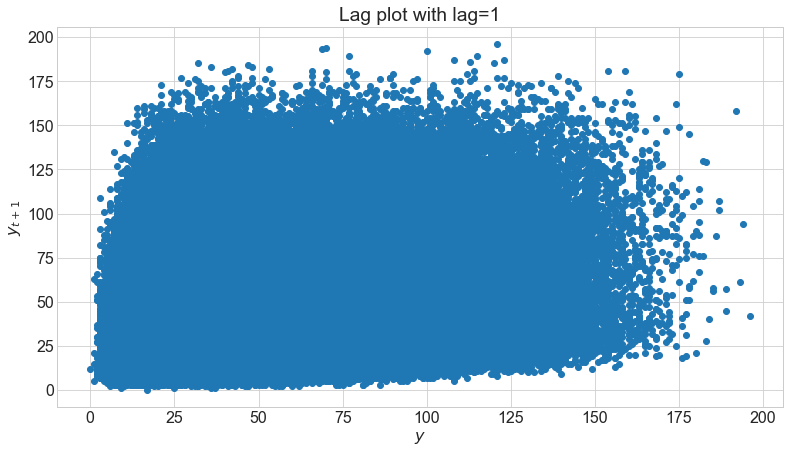

In [23]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

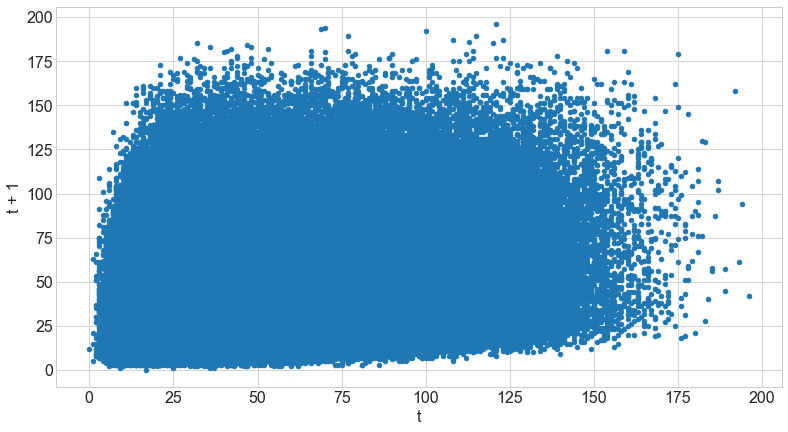

In [24]:
train['y(t + 1)'] = train.sale_amount.shift(-1)
ax = train.plot.scatter(x='sale_amount', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

### OPSD (Germany) Dataset

#### Percentage Based Data Split

In [26]:
germany_df.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006


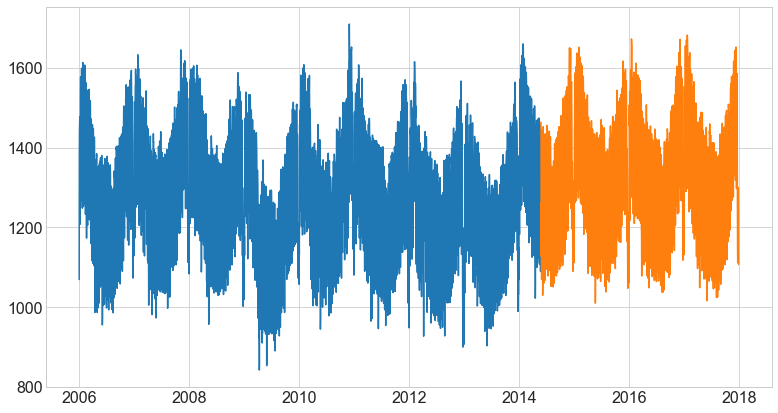

In [27]:
train_size = .70
n = germany_df.shape[0]
test_start_index = round(train_size * n)

train = germany_df[:test_start_index] # everything up (not including) to the test_start_index
test = germany_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

<AxesSubplot:xlabel='Date'>

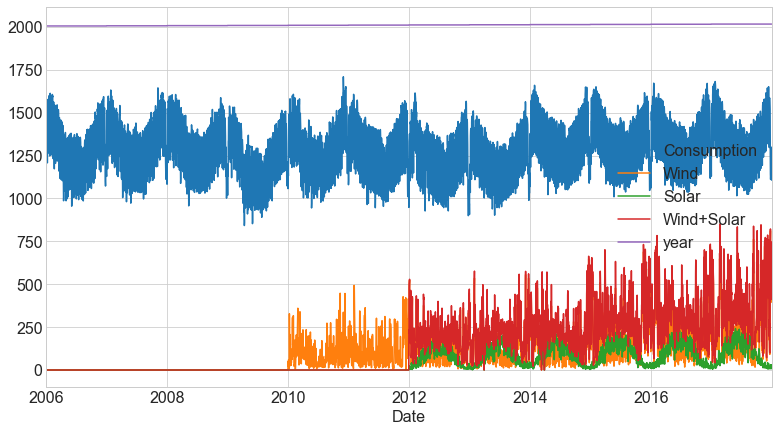

In [28]:
germany_df.plot()

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

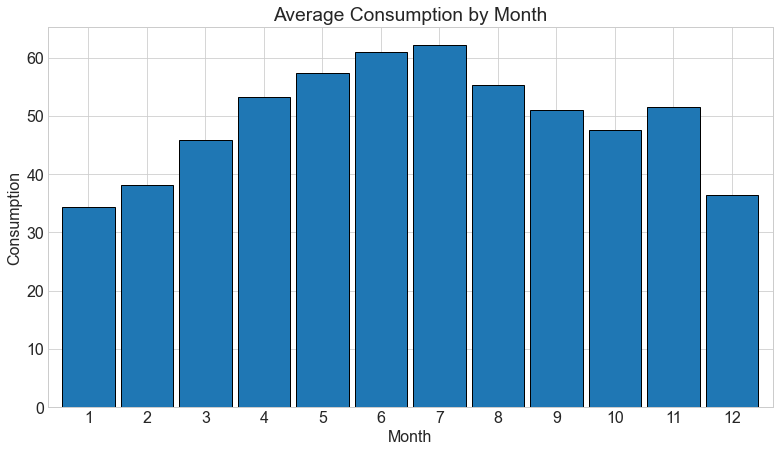

In [29]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')

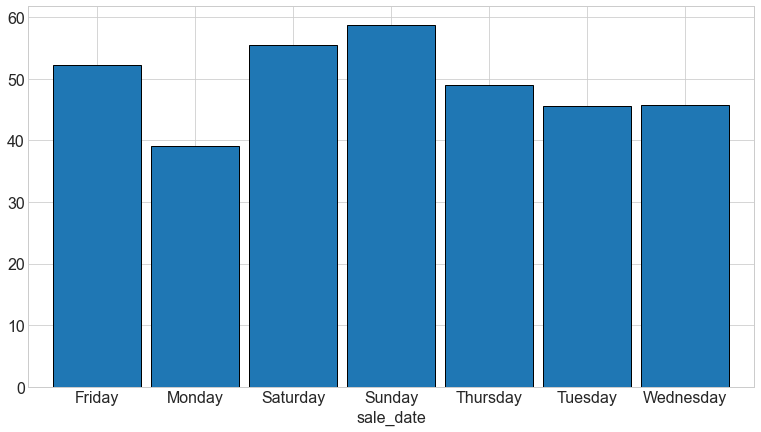

In [32]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')
None

<AxesSubplot:xlabel='sale_date'>

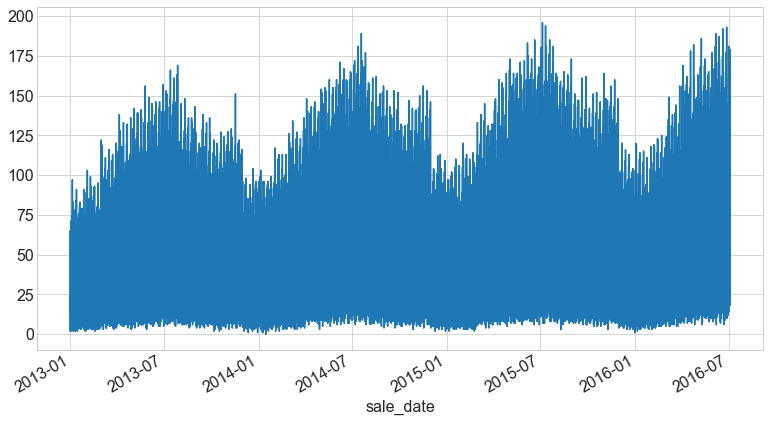

In [33]:
#target over time
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

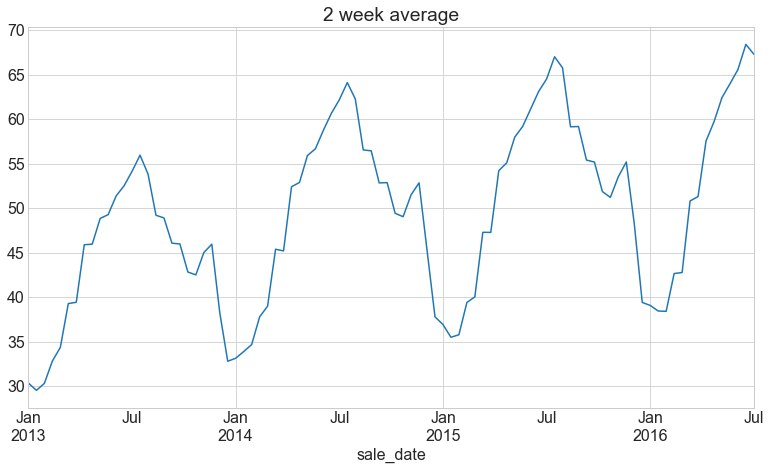

In [34]:
y.resample('2W').mean().plot(title='2 week average')

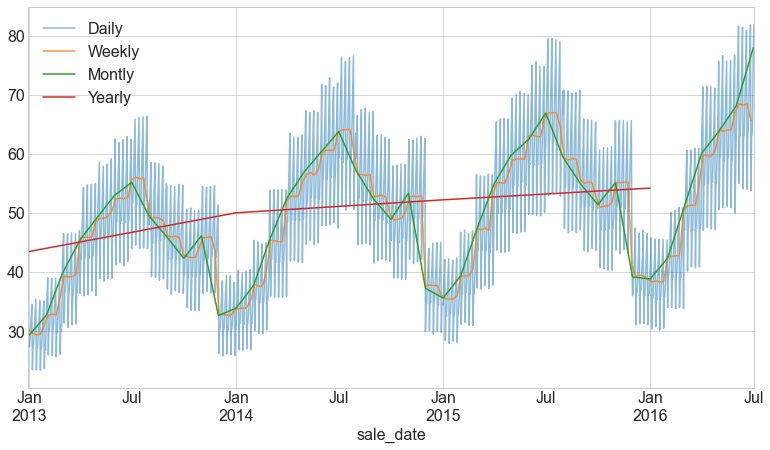

In [35]:
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()
None

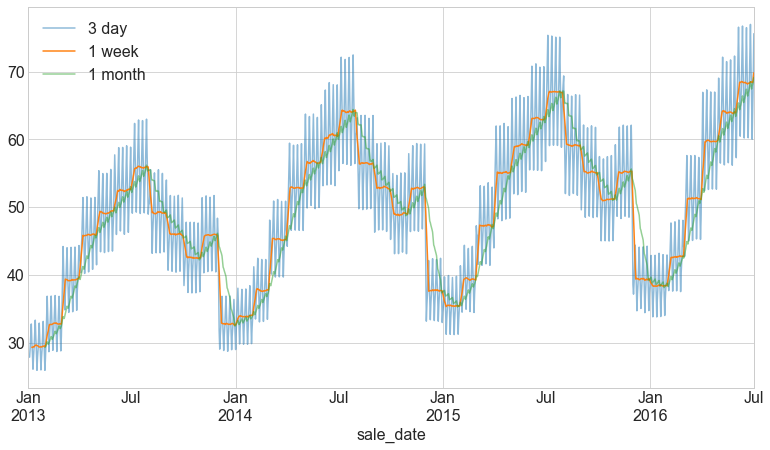

In [36]:
#rolling average
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=.5, label='1 month')
plt.legend()
None

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

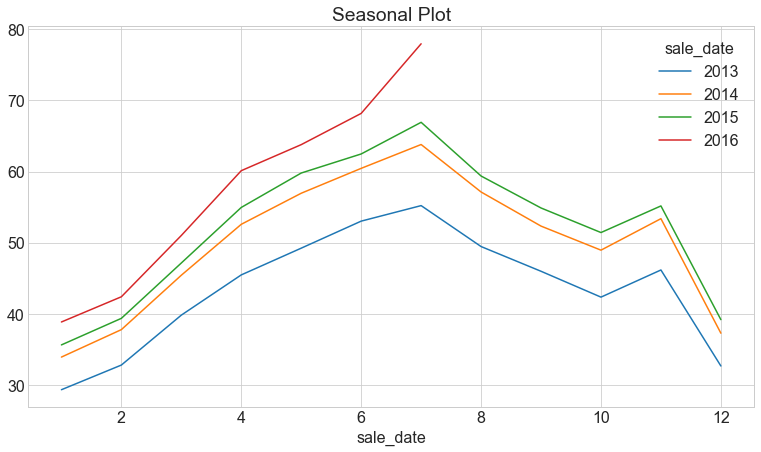

In [37]:
#Seasonal Plot
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

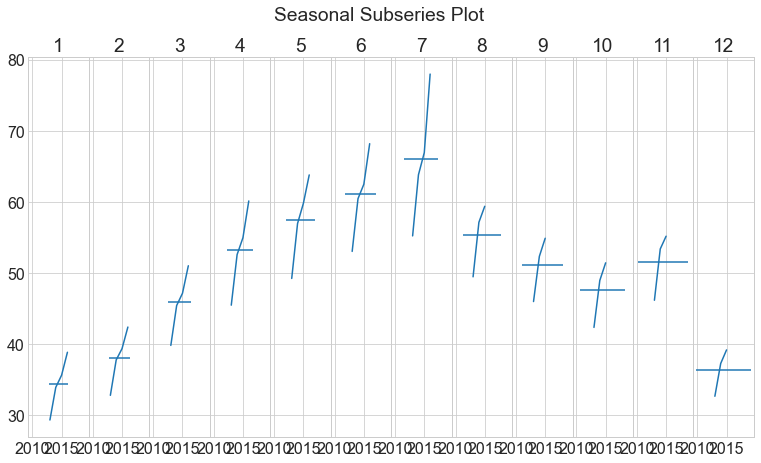

In [38]:
#seasonal subseries plot
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

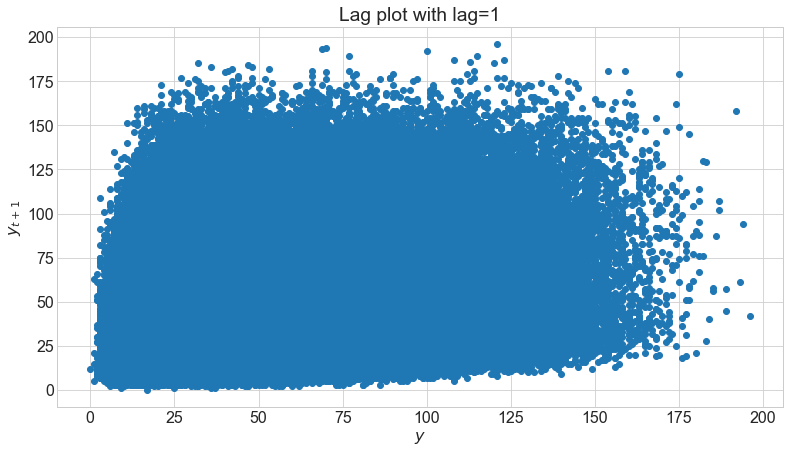

In [39]:
#Lag Plot
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

,this_week,Wind,Solar,Wind+Solar,year,the_next_week
Date,,,,,,
2006-01-01,1069.184000,0.000000,0.000000,0.000000,2006.0,1381.300143
2006-01-08,1381.300143,0.000000,0.000000,0.000000,2006.0,1486.730286
2006-01-15,1486.730286,0.000000,0.000000,0.000000,2006.0,1490.031143
2006-01-22,1490.031143,0.000000,0.000000,0.000000,2006.0,1514.176857
2006-01-29,1514.176857,0.000000,0.000000,0.000000,2006.0,1501.403286
...,...,...,...,...,...,...
2014-05-04,1295.405714,52.989714,110.741857,163.731571,2014.0,1372.166000
2014-05-11,1372.166000,204.100143,124.597143,328.697286,2014.0,1372.636143
2014-05-18,1372.636143,117.518286,131.462000,248.980286,2014.0,1357.924714


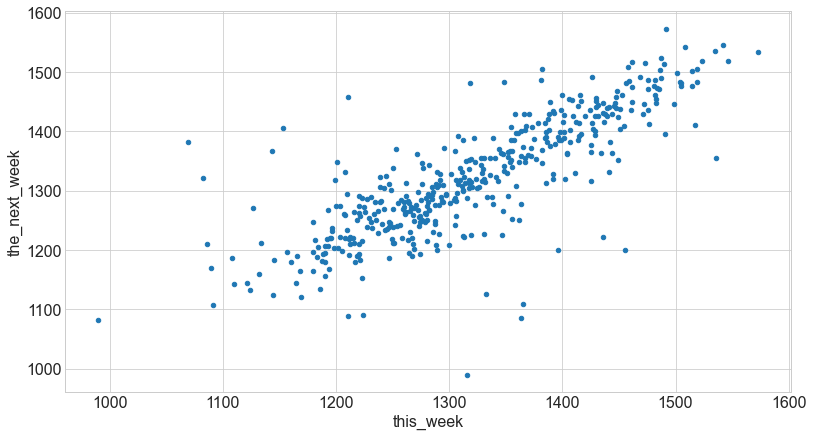

In [41]:
weekly = train.resample('W').mean()
weekly['the_next_week'] = weekly.Consumption.shift(-1)
weekly = weekly.rename(columns={'Consumption': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
weekly

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

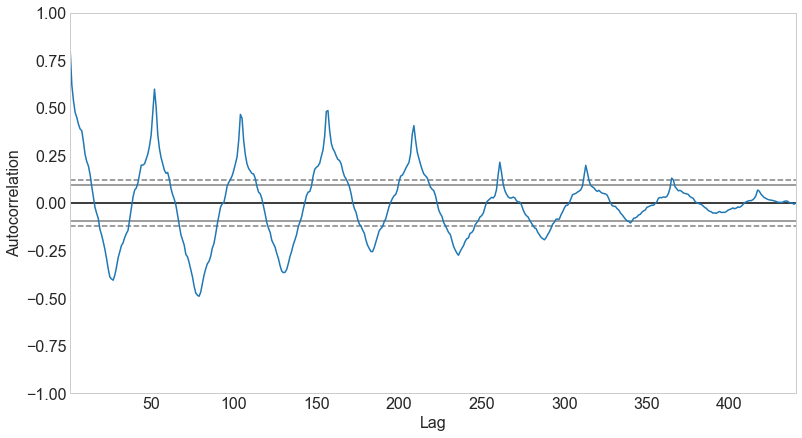

In [42]:
#Autocorrelation Plot
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

In [43]:
#Seasonal Decomposition
y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-68.437315,NaN
2006-01-08,1381.300143,NaN,-125.834756,NaN
2006-01-15,1486.730286,NaN,35.842411,NaN
2006-01-22,1490.031143,NaN,106.451350,NaN
2006-01-29,1514.176857,NaN,122.022124,NaN


<AxesSubplot:xlabel='Date'>

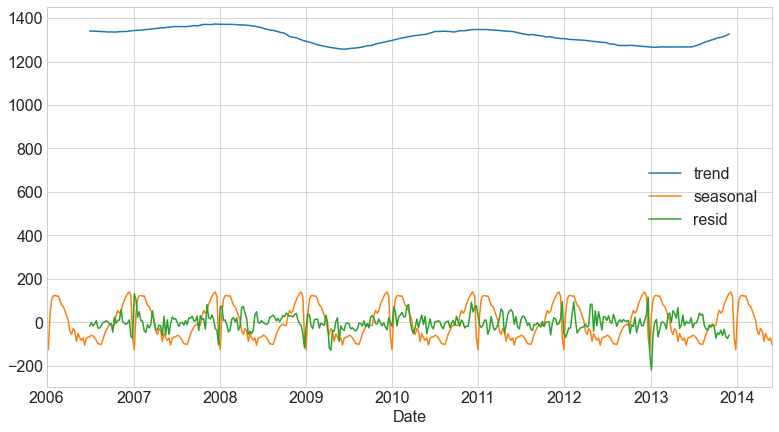

In [44]:
decomposition.iloc[:, 1:].plot()

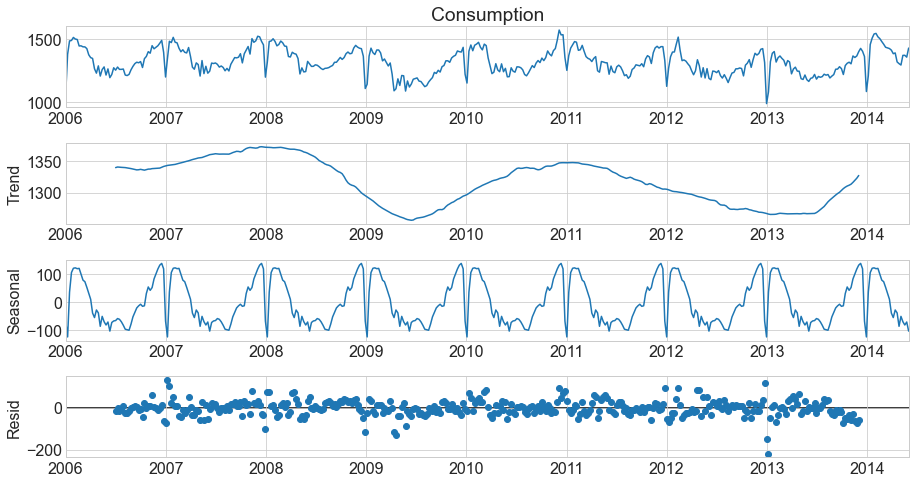

In [45]:
# the value returned from seasonal_decompose can itself be plotted:
result.plot()
None

In [46]:
train = train.resample('D').mean()
# create a categorical feature
train['Consumption_bin'] = pd.qcut(train.Consumption, 3, labels=['High Consumption', 'Average Consumption', 'Low Consumption'])
train.groupby('Consumption_bin').mean()

,Consumption,Wind,Solar,Wind+Solar,year
Consumption_bin,,,,,
High Consumption,1125.874587,65.577156,26.331001,69.319043,2009.879765
Average Consumption,1345.901834,59.831141,29.165084,65.998640,2009.715264
Low Consumption,1493.085339,66.784214,13.010112,46.922207,2009.548387
